# Homework 8:  Resampling methods

This homework assignment is designed to give you practice with bootstrapping and permutation tests.

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 

This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading & Visualizing the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file. 

(a) Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`, self reported at time of data collection), Flanker Task performance (`Flanker_Unadj`), total intracranial volume (`FS_IntraCranial_Vol`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame. 

In [3]:
#Load packages
library(tidyverse)
library(ggplot2)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [12]:
#Load data
setwd("C:/Users/MCT40/OneDrive - University of Pittsburgh/Classes/Spring2022/CMU_STATS/HOMEWORK")

hcp_data <- read.csv("hcp_data/unrestricted_trimmed_1_7_2020_10_50_44.csv")

hcp_data %>% 
    select(Subject, Gender, Flanker_Unadj, FS_IntraCranial_Vol, FS_Tot_WM_Vol, FS_Total_GM_Vol) %>%
    drop_na() -> d1

any(d1 == "n/a")

head(d1)

[1] FALSE

,Subject,Gender,Flanker_Unadj,FS_IntraCranial_Vol,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<dbl>,<int>,<int>
1,100206,M,130.42,1864518,543134,807245
2,100307,F,112.56,1512540,407292,664124
3,100408,M,121.18,1684117,500417,726206
4,100610,M,126.53,1816044,512946,762308
5,101006,F,101.85,1437868,429449,579632
6,101107,M,107.04,1512727,416995,665024


(b) Plot grey matter volume (x axis) against intracranial volume (y axis) and Gender (point color). 

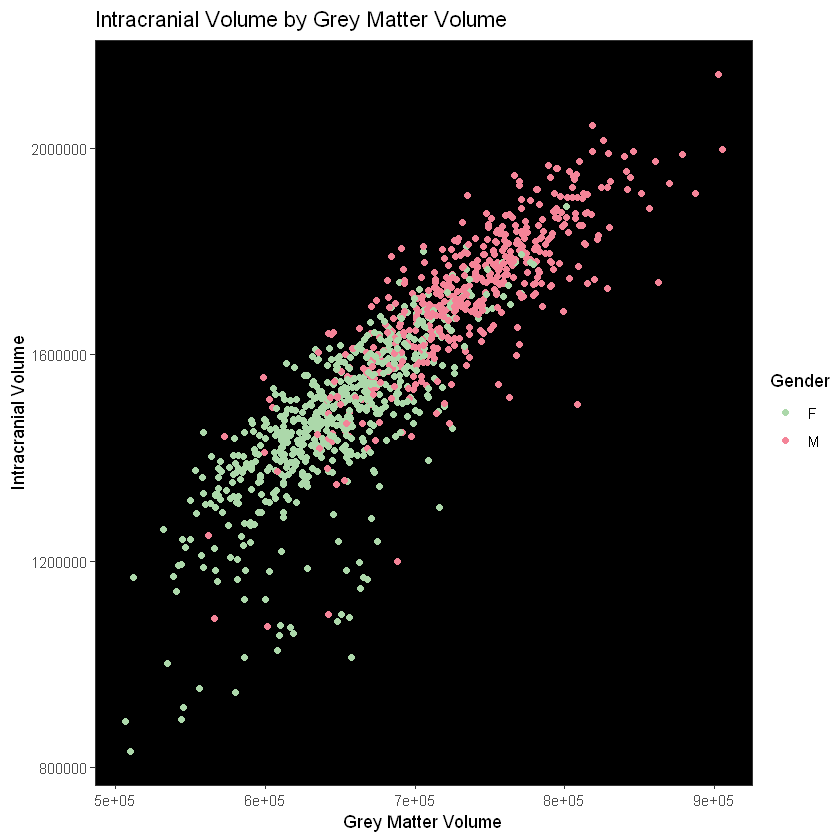

In [13]:
ggplot(d1, aes(FS_Total_GM_Vol, FS_IntraCranial_Vol, colour=Gender)) +
  geom_point() +
  theme_test() +
  labs(x = "Grey Matter Volume", y = "Intracranial Volume", title = "Intracranial Volume by Grey Matter Volume") +
  scale_color_manual(values = c("#ACD8AA", "#F48498")) +
  theme(panel.background = element_rect(fill = "black")) 


What patterns do you observe in the scatter plot?

> Females tend to have smaller overall grey matter volume and intracranial volume compared to men

> Additionally there appears to be a linear correlation between the two (grey matter and intracranial volume), which makes sense since if there's a bigger skull it's probably filled with grey/white matter. 

---
## 2. Logistic classifier (2 points)

We want to try predicting gender using the neural data you have loaded.

(a) Run a logisic regression model to predict gender from total white matter volume, total grey matter volume, and intracranial volume. 

In [17]:
d1$Gender <- as.factor(d1$Gender)


#Run the log regression
Log_reg_hcp <- glm(Gender ~ FS_Tot_WM_Vol*FS_Total_GM_Vol*FS_IntraCranial_Vol, data= d1, family = binomial)
summary(Log_reg_hcp)



Call:
glm(formula = Gender ~ FS_Tot_WM_Vol * FS_Total_GM_Vol * FS_IntraCranial_Vol, 
    family = binomial, data = d1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7971  -0.6071  -0.2616   0.5740   2.7208  

Coefficients:
                                                    Estimate Std. Error z value
(Intercept)                                        3.689e+01  7.095e+01   0.520
FS_Tot_WM_Vol                                     -7.339e-05  1.815e-04  -0.404
FS_Total_GM_Vol                                   -3.212e-05  1.123e-04  -0.286
FS_IntraCranial_Vol                               -5.468e-05  4.226e-05  -1.294
FS_Tot_WM_Vol:FS_Total_GM_Vol                      3.005e-11  2.737e-10   0.110
FS_Tot_WM_Vol:FS_IntraCranial_Vol                  9.667e-11  1.054e-10   0.917
FS_Total_GM_Vol:FS_IntraCranial_Vol                6.490e-11  6.442e-11   1.007
FS_Tot_WM_Vol:FS_Total_GM_Vol:FS_IntraCranial_Vol -9.055e-17  1.535e-16  -0.590
                               

Which factors are signficantly associated with gender?

> None are statistically significant at p<.05

(b) Estimate the prediction accuracy of your model (Note: this is the training set accuracy). Set your prediction threshold to 0.5.

In [15]:
# 2b) ##Can also  change the model to use the values in this matrix
threshold = 0.50

d2_predict = data.frame(predict(Log_reg_hcp, type = "response"))

## Rename the predicted values generated above to "predicted_prob" for ease of interpretability
colnames(d2_predict) = c('predicted_prob')
head(d2_predict)

# Make a list of "Incorrect" responses (coded as 0)
num_obs = nrow(d2)
d2_predict$predicted_binary=rep(1,num_obs)
d2_predict$predicted_binary[d2_predict$predicted_prob>threshold]= 2

# Look at the prediction accuracy in form of confusion matrix table
d2_conf = data.frame(d2_predict$predicted_binary, as.factor(d2$Gender))
colnames(d2_conf) = c('predicted', 'actual')
table(d2_conf)

## Abbreviated summary: 
## 522 predicted 0 actual F (true neg)
## 115 predicted 0 actual M (false neg)
## 84  predicted 1 actual F (false pos)
## 392 predicted 1 actual M (true pos)

## Calculate the general accuracy of the model's predictions: 
print(paste("Accuracy:",mean(d2_conf$predicted == d2_conf$actual)))

,predicted_prob
,<dbl>
1,0.97989278
2,0.23036160
3,0.75067805
4,0.94330674
5,0.04695691
6,0.23711665


         actual
predicted   1   2
        1 522 115
        2  84 392

[1] "Accuracy: 0.821203953279425"


What is the prediction accuracy for gender from the full model?


> The accuracy is 82.12% which is pretty good! 

---
## 3. Bootstrapped accuracy (3 points)

Use bootstrapping to estimate the confidence intervals of the _prediction accuracy_ of your model. Plot the histogram of the bootstrapped prediction accuracies and estimate the confidence intervals off of the standard deviation from the bootstrap.


In [10]:
# 3 Boostraped accuracy
#install.packages("boot")
# install.packages("ISLR")
library(ISLR)
library(boot)
set.seed(33)

#write boostrapping function
boot.fn <- function(data, index){  
  threshold = 0.50
  
  d2_predict = data.frame(predict(Log_reg_hcp, type = "response"))
  
  ## Rename the predicted values generated above to "predicted_prob" for ease of interpretability
  colnames(d2_predict) = c('predicted_prob')
  head(d2_predict)
  
  # Make a list of "Female" responses (coded as 1)
  num_obs = nrow(d2)
  d2_predict$predicted_binary=rep(1,num_obs)
  d2_predict$predicted_binary[d2_predict$predicted_prob>threshold]= 2
  
  # Look at the prediction accuracy in form of confusion matrix table
  d2_conf = data.frame(d2_predict$predicted_binary, as.factor(d2$Gender))
  colnames(d2_conf) = c('predicted', 'actual')
  table(d2_conf)
  
  return(paste("Accuracy:",mean(d2_conf$predicted == d2_conf$actual)))
  }

#run bootstrapping function
print(boot.fn(d2, 1:1113))

##Run it with random resampling: 
boot_obj = boot(d2,boot.fn,R=1000) #R=repetitions 
print(boot_obj[["t"]]) 

hist(boot(d2,boot.fn ,R=1000)$t[,1], xlab="Horsepower coefficient") #we get a distribution of all of the estimates
#                               ^^ indexing the second "t" value


[1] "Accuracy: 0.821203953279425"
        [,1]                         
   [1,] "Accuracy: 0.821203953279425"
   [2,] "Accuracy: 0.821203953279425"
   [3,] "Accuracy: 0.821203953279425"
   [4,] "Accuracy: 0.821203953279425"
   [5,] "Accuracy: 0.821203953279425"
   [6,] "Accuracy: 0.821203953279425"
   [7,] "Accuracy: 0.821203953279425"
   [8,] "Accuracy: 0.821203953279425"
   [9,] "Accuracy: 0.821203953279425"
  [10,] "Accuracy: 0.821203953279425"
  [11,] "Accuracy: 0.821203953279425"
  [12,] "Accuracy: 0.821203953279425"
  [13,] "Accuracy: 0.821203953279425"
  [14,] "Accuracy: 0.821203953279425"
  [15,] "Accuracy: 0.821203953279425"
  [16,] "Accuracy: 0.821203953279425"
  [17,] "Accuracy: 0.821203953279425"
  [18,] "Accuracy: 0.821203953279425"
  [19,] "Accuracy: 0.821203953279425"
  [20,] "Accuracy: 0.821203953279425"
  [21,] "Accuracy: 0.821203953279425"
  [22,] "Accuracy: 0.821203953279425"
  [23,] "Accuracy: 0.821203953279425"
  [24,] "Accuracy: 0.821203953279425"
  [25,] "Accurac

ERROR: Error in hist.default(boot(d2, boot.fn, R = 1000)$t[, 1], xlab = "Horsepower coefficient"): 'x' must be numeric


How robust is the prediction accuracy of the full model?

> *Write your response here* 
> Idk. Because it won't run. oups

---
## 4. Permutation test for grey matter effects (3 points)

Now run a permutation test, with 1000 iterations, to evaluate how much grey matter volume contributes to the prediction accuracy. Compare the prediction accuracy of the full (unpermuted model) with the distribution of accuracies you get with a randomized grey matter volume term using a histogram (Hint: use the `abline` function to show the original accuracy on the histogram).

In [ ]:
#permutation test from the tutorial. #need to add abline
perm_d2 = d2

R =1000

perm.coefs=matrix(NA,nrow=R, ncol=2) #

for (i in 1:R){
  perm_d2$XXX = d2$XXXr[sample(392)] # This is a shuffled version of the Auto$horsepower vector
  perm.acc[i,]= XXXaccuracy ###
}

# Take a look at the null distributions
hist(perm.acc[,2])


# Now re-estimate the real (unpermuted) effect 
perm.real = XXXaccuracy
perm.real


How much does the grey matter volume influence the prediction accuracy of the model?

> *Write your response here* 
> 

---
## 5. Reflection (1 point)

Differentiate the bootstrap from a permutation test. Describe each and when is it appropriate use to each.

> From the tutorial: 

Bootstrapping:

    quantifies uncertainty by reusing the data (random resampling with replacement)

    answers the question: what is the range of values I can expect for a statistic, given the varaibility in my data?

Permutation testing:

    breaks whatever structure may exist between variables of interest while maintaining the structure between others (permute, or shuffle, the relationship between x and y, for example)

    allows targeted null hypothesis testing

    quantifies the null distribution for a given hypothesis

    answers the question: what kind of pattern would you expect to see if there were no statistical relationship between two (or more) variables?

These methods are useful if you need non-parametric estimates of uncertainty for a given statistic (bootstrapping) or if you need a non-parametric way of testing your hypotheses (permutation). In other words, if you don’t want to risk making assumptions about the functional form of your data during uncertainty estimation or hypothesis testing, these randomization methods are for you.

However, keep in mind that there are cons (and assumptions) associated with non-parametric methods. For example, one major limitation of bootstrapping is that you must make the assumption that your data contains variability similar to the kind of variability you might see when you sample new datasets in the wild, given the same statistical model, to make inferential interpretations. See here and here for more information.

**DUE:** 5pm EST, April 1, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> Emily Goldberg! Shoutout to making it through this week; 